In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fahim53kaggle","key":"69efb005078e39dff82b7695bfe41dba"}'}

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jul  9 06:34 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 330M/337M [00:09<00:00, 29.0MB/s]
100% 337M/337M [00:09<00:00, 37.0MB/s]


In [0]:
from zipfile import ZipFile
zip = ZipFile('cell-images-for-detecting-malaria.zip')
zip.extractall()

In [0]:
pip install split-folders

In [0]:
import split_folders
split_folders.ratio('cell_images', output='output', seed=1337, ratio=(.7, .3, 0))

In [0]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from zipfile import ZipFile

Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=(128, 128, 3), activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

W0709 06:38:09.015326 139622571161472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0709 06:38:09.066031 139622571161472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 06:38:09.074379 139622571161472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instea

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8388736   
__________

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_data = train_datagen.flow_from_directory('output/train',
                                                 target_size = (128, 128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

validation_data = test_datagen.flow_from_directory('output/val',
                                            target_size = (128, 128),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 19290 images belonging to 2 classes.
Found 8268 images belonging to 2 classes.


In [0]:
model.compile(Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

W0709 06:39:13.251687 139622571161472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 06:39:13.263719 139622571161472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)


In [0]:
history = model.fit_generator(training_data,
                              steps_per_epoch= 1205,
                              epochs=30,
                              callbacks=[checkpointer],
                              validation_data=validation_data,
                              validation_steps=517)

W0709 06:39:22.189805 139622571161472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 06:39:22.277375 139622571161472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
1205/1205 [==============================] - 138s 115ms/step - loss: 0.5559 - acc: 0.7182 - val_loss: 0.3318 - val_acc: 0.8990

Epoch 00001: val_acc improved from -inf to 0.89901, saving model to best_weights.hdf5
Epoch 2/30
1205/1205 [==============================] - 130s 108ms/step - loss: 0.2547 - acc: 0.9072 - val_loss: 0.2293 - val_acc: 0.9173

Epoch 00002: val_acc improved from 0.89901 to 0.91727, saving model to best_weights.hdf5
Epoch 3/30
1205/1205 [==============================] - 129s 107ms/step - loss: 0.2078 - acc: 0.9282 - val_loss: 0.1937 - val_acc: 0.9321

Epoch 00003: val_acc improved from 0.91727 to 0.93215, saving model to best_weights.hdf5
Epoch 4/30
1205/1205 [==============================] - 130s 108ms/step - loss: 0.1837 - acc: 0.9385 - val_loss: 0.1658 - val_acc: 0.9465

Epoch 00004: val_acc improved from 0.93215 to 0.94654, saving model to best_weights.hdf5
Epoch 5/30
1205/1205 [==============================] - 130s 108ms/step - loss: 0.1687 - ac

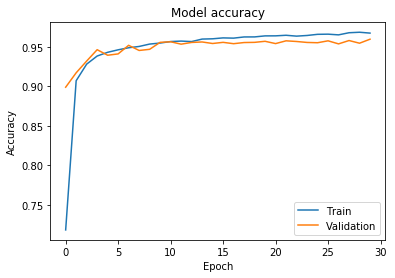

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

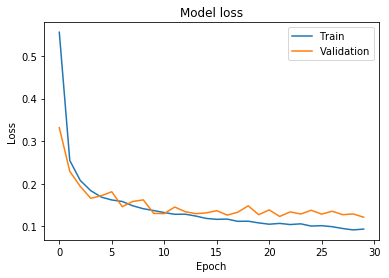

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [0]:
pip install keract

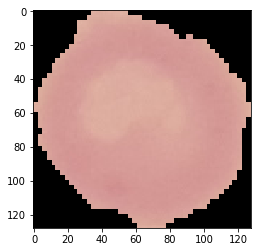

(1, 128, 128, 3)


In [0]:
img_path = 'guineapig2.png'
img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [0]:
from keract import get_activations
activations = get_activations(model, x=img_tensor)

conv2d_1/Relu:0 (1, 128, 128, 32) 


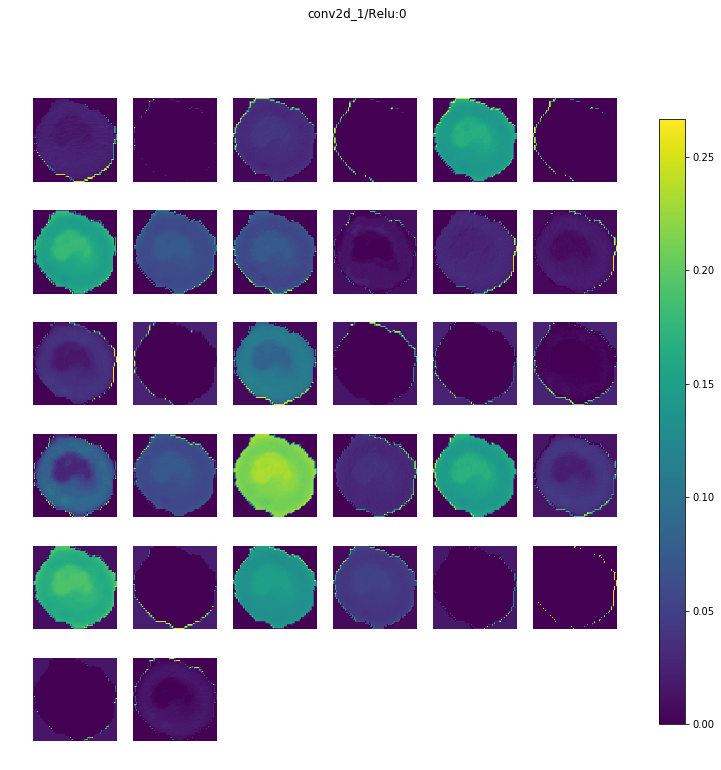

conv2d_2/Relu:0 (1, 128, 128, 32) 


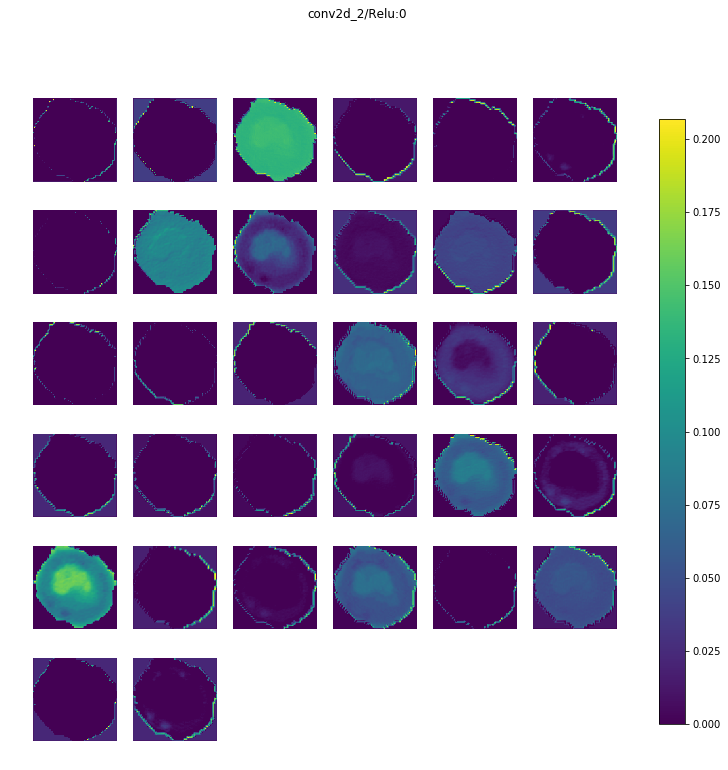

max_pooling2d_1/MaxPool:0 (1, 64, 64, 32) 


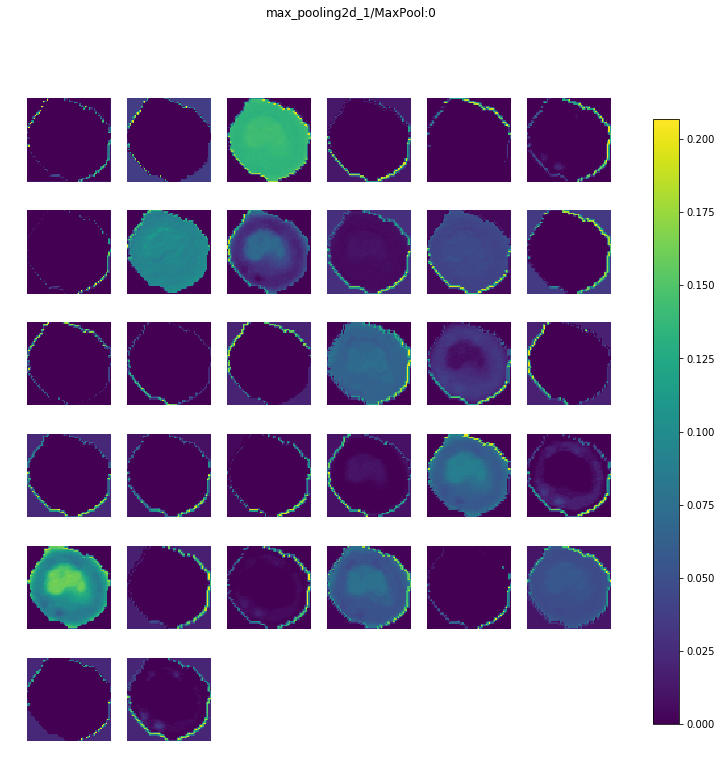

conv2d_3/Relu:0 (1, 64, 64, 64) 


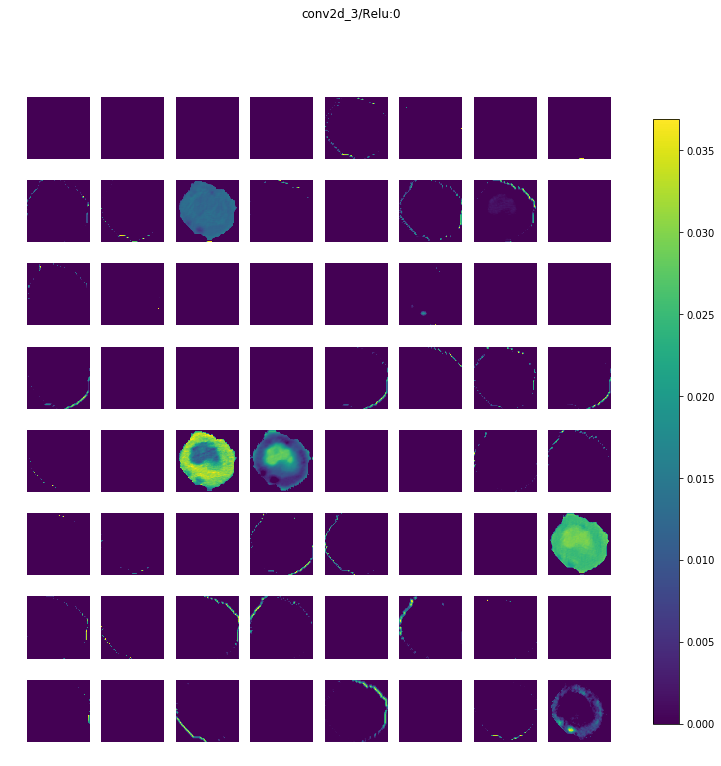

max_pooling2d_2/MaxPool:0 (1, 32, 32, 64) 


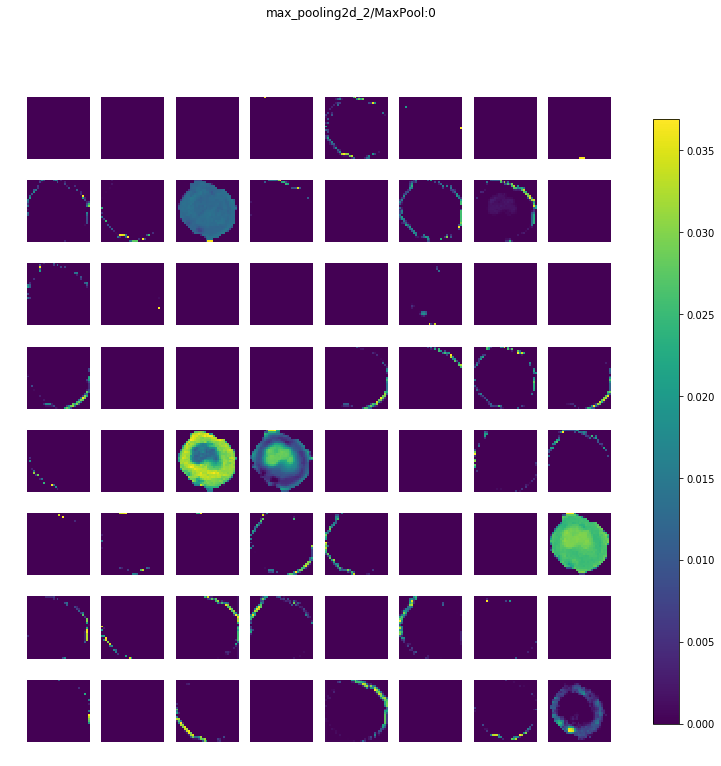

flatten_1/Reshape:0 (1, 65536) -> Skipped. 2D Activations.
dense_1/Relu:0 (1, 128) -> Skipped. 2D Activations.
dense_2/Softmax:0 (1, 2) -> Skipped. 2D Activations.


In [0]:
from keract import display_activations
display_activations(activations, save=False)